In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from pytrends.request import TrendReq
import googlesearch
from googlesearch import search
import time
import re
from multiprocess import Scraper
from searching import Finder


In [4]:
#so the goal here is to provide some topics, get the top keywords for each topic, create some keyword queries to search google with, and then parse each page for certain elements
#elements: h-tags, b-tags, strong-tags, a-tags, "artcle", "main", "content"
#add items from each element to a list and create histogram/s for each element
#gives a good idea as to how to place high on google search. (Assuming you're doing the rest of SEO optimization well enough)
#should only need to provide a list of queries to pass to google and get results via that.
topics = ['lumber prices', 'lumber stock', 'lumber companies']  # should only ever need to update this list and run everything
sea = Finder(topics)
sea.start_search()
sea.querieslist

[{'lumber prices': ['lumber prices today']},
 {'lumber stock': ['lumber prices',
   'lumber stock prices',
   'lumber stock price',
   'lumber price',
   'stock market']},
 {'lumber companies': ['lumber companies near me']}]

In [42]:
stoplist = ["that's","thats","also","get","like","it's",""," ",".","i'm","i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now", "&", ]

In [ ]:
urls = sea.url_list
scr = Scraper()
scr.start(urls)

In [71]:
a = pd.DataFrame(scr.words, columns=['words'])
a['words'] = a['words'].str.lower()
a['words'] = a['words'].str.replace(r'(\n)*','',regex=True).replace(r'(\t)*','',regex=True)
a = a.where((~a['words'].isin(stoplist))&(~a['words'].str.isnumeric())).dropna(axis=0,how='all')

,words
2,invest
4,confidence
5,overviewstock
6,market
7,basicsoverviewstock
...,...
3076479,lbs
3076480,lbs
3076481,lbs
3076482,lbs


In [105]:
a = a.reset_index()
a.drop('index',axis=1,inplace=True)
# a.drop('level_0',axis=1,inplace=True)
b = pd.DataFrame(a['words'].groupby(a['words']).agg(['count']).sort_values(by='count',ascending=False))
b

,count
words,
stock,79692
market,47794
trading,23980
exchange,19305
vs.,17422
...,...
decision,8
dotdash,5
publishing family.,5


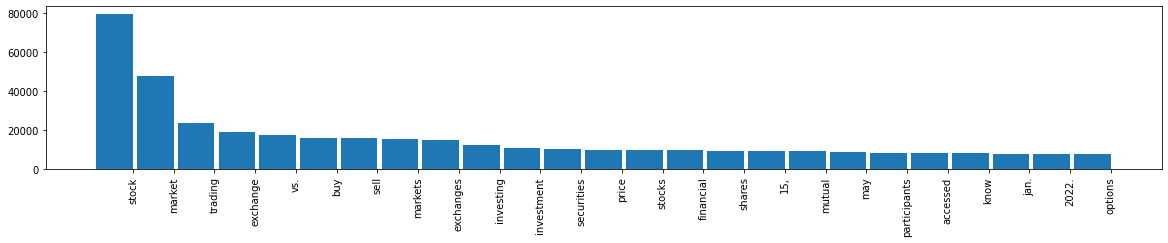

In [120]:
plt.rcParams['figure.figsize'] = (20,3)
plotframe = b.head(25)
indexes = np.arange(len(plotframe.index))
width = 0.9
plt.bar(indexes, plotframe['count'], width)
plt.xticks(indexes + width * 0.5, plotframe.index, rotation=90)
plt.show()

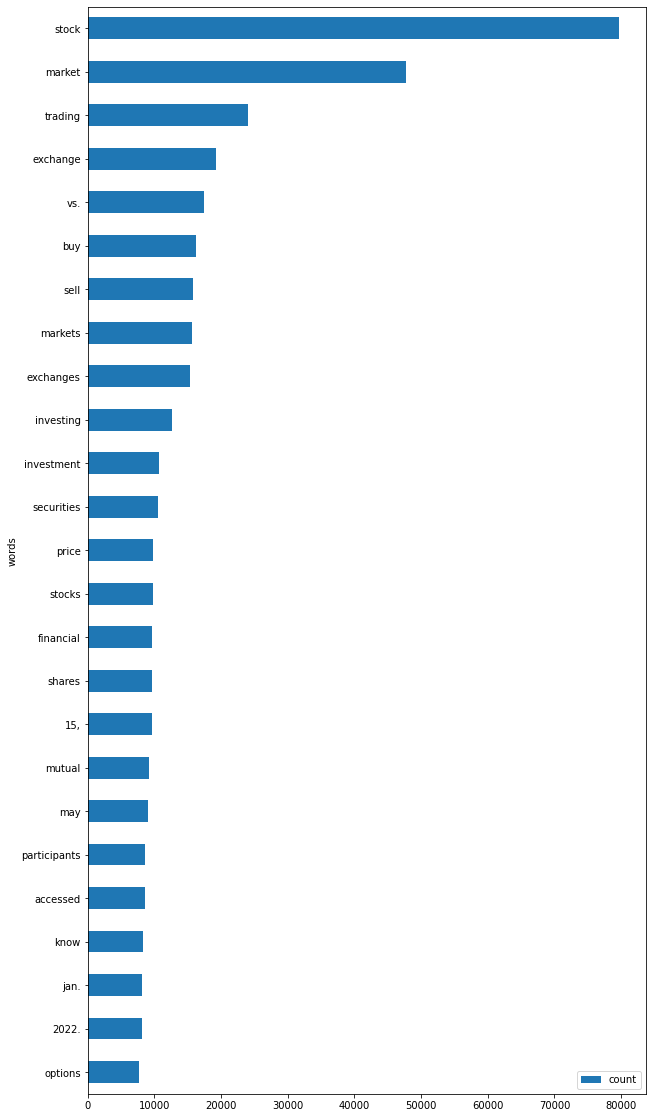

,count
words,
stock,79692
market,47794
trading,23980
exchange,19305
vs.,17422
buy,16240
sell,15851
markets,15673
exchanges,15282


In [121]:
plt.rcParams['figure.figsize'] = (10,20)
plotframe.plot.barh().invert_yaxis()
plt.show()
plotframe.head(20)